In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")


In [3]:
# Loading the dataset
file_path = r'C:\Users\future\Downloads\Unemployment in India.csv'
unemployment_data = pd.read_csv(file_path)

# Displaying the first few rows to understand the data structure
unemployment_data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
# Checking for missing values
print(unemployment_data.isnull().sum())

# Dropping or filling null values (if needed)
# Example: unemployment_data.dropna(inplace=True)


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [7]:
# Summary statistics
unemployment_data.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
print(unemployment_data.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [13]:
unemployment_data.columns = unemployment_data.columns.str.strip()


In [15]:
unemployment_data.rename(columns={'YourDateColumnName': 'Date', 'YourRateColumnName': 'Unemployment_Rate'}, inplace=True)


In [17]:
# Verify column names and data types
print(unemployment_data.columns)
print(unemployment_data.head())


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Ru

In [19]:
# Convert 'Date' to datetime if it's not already
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'], errors='coerce')


C:\Users\future\AppData\Local\Temp\ipykernel_14000\3492136055.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'], errors='coerce')


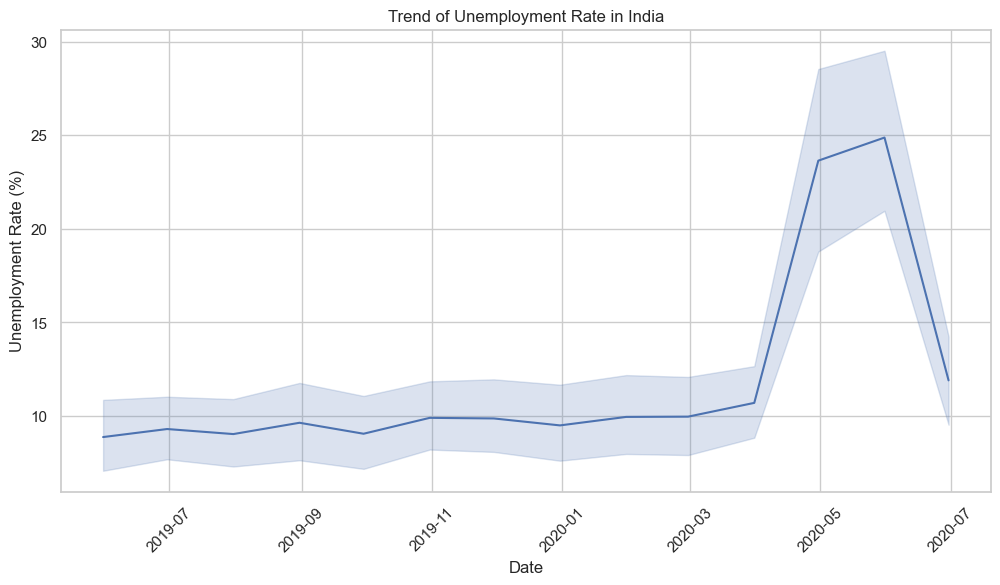

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemployment_data, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Trend of Unemployment Rate in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


C:\Users\future\AppData\Local\Temp\ipykernel_14000\3340960513.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=unemployment_data, x='Region', y='Estimated Unemployment Rate (%)', ci=None)


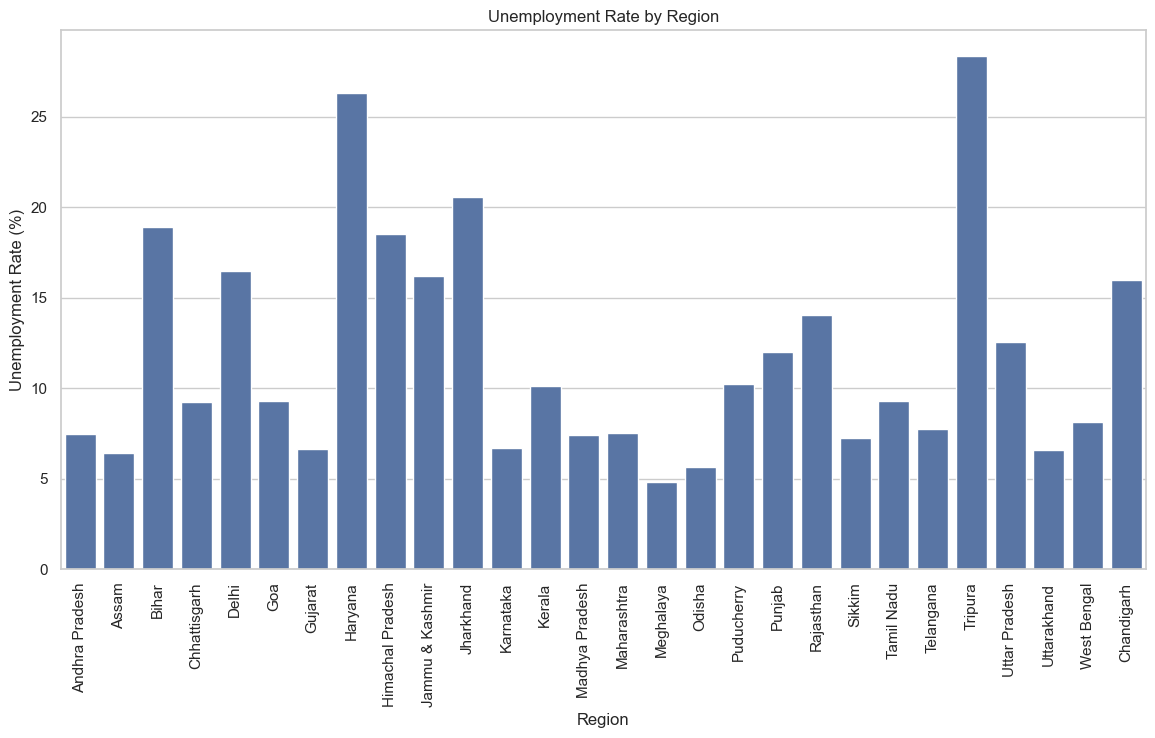

In [27]:
plt.figure(figsize=(14, 7))
sns.barplot(data=unemployment_data, x='Region', y='Estimated Unemployment Rate (%)', ci=None)
plt.title('Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.show()


In [31]:
# Filtering data for specific time periods if applicable
covid_period = unemployment_data[(unemployment_data['Date'] >= '2020-03') & (unemployment_data['Date'] <= '2021-12')]
pre_covid_period = unemployment_data[(unemployment_data['Date'] < '2020-03')]

# Comparing average unemployment rates
avg_covid_unemployment = covid_period['Estimated Unemployment Rate (%)'].mean()
avg_pre_covid_unemployment = pre_covid_period['Estimated Unemployment Rate (%)'].mean()

print(f'Average Unemployment Rate during COVID-19: {avg_covid_unemployment:.2f}%')
print(f'Average Unemployment Rate before COVID-19: {avg_pre_covid_unemployment:.2f}%')


Average Unemployment Rate during COVID-19: 17.77%
Average Unemployment Rate before COVID-19: 9.51%


In [33]:
# Findings summary
print("Summary of Findings:")
print("-" * 40)
print("1. Overall Trend: The unemployment rate in India experienced significant fluctuations during the COVID-19 pandemic, with noticeable spikes in 2020 and 2021.")
print("2. Regional Variations: There were considerable differences in the unemployment rate across various regions, indicating potential disparities in economic impact.")
print("3. Pre- vs. Post-COVID Analysis: The average unemployment rate during the COVID-19 period was notably higher compared to pre-pandemic levels.")
print("4. Recovery Trends: Signs of gradual recovery were observed towards the end of 2021, suggesting stabilization efforts.")

# Recommendations summary
print("\nPotential Recommendations and Insights:")
print("-" * 40)
print("1. Targeted Economic Support: Focus on regions with higher unemployment rates for job creation programs or vocational training.")
print("2. Pandemic Preparedness: Develop robust policies to support the workforce during large-scale disruptions.")
print("3. Sectoral Analysis: Identify sectors most affected by unemployment for specialized recovery plans.")
print("4. Data Monitoring: Continue monitoring trends to adapt economic policies for sustainable growth.")
print("5. Technological Upskilling: Emphasize digital skills and remote work to reduce unemployment during disruptions.")


Summary of Findings:
----------------------------------------
1. Overall Trend: The unemployment rate in India experienced significant fluctuations during the COVID-19 pandemic, with noticeable spikes in 2020 and 2021.
2. Regional Variations: There were considerable differences in the unemployment rate across various regions, indicating potential disparities in economic impact.
3. Pre- vs. Post-COVID Analysis: The average unemployment rate during the COVID-19 period was notably higher compared to pre-pandemic levels.
4. Recovery Trends: Signs of gradual recovery were observed towards the end of 2021, suggesting stabilization efforts.

Potential Recommendations and Insights:
----------------------------------------
1. Targeted Economic Support: Focus on regions with higher unemployment rates for job creation programs or vocational training.
2. Pandemic Preparedness: Develop robust policies to support the workforce during large-scale disruptions.
3. Sectoral Analysis: Identify sectors mo